<a href="https://colab.research.google.com/github/rjrahul24/AppliedML-Project/blob/main/AML_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction of Wine Quality based on its Manufacturing Ingredients**

Data Importing and Initial Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/AML Project 33/
import pandas as pd
df =  pd.read_csv('./winequalityN.csv',sep = ",")
df.head()

Mounted at /content/drive/
/content/drive/.shortcut-targets-by-id/1k3jxyxzYG_vM8C-wBK2z2Si_clg3eSsH/AML Project 33


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Analysis of Missing Values**

In the sections below, we wil be exploring missing values in the dataset. We have replaced the missing values in this case with the mean from its own class i.e. either red or white wine. This makes sure more appropriate values are appended rather than the generic mean.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.isna().mean()

type                    0.000000
fixed acidity           0.001539
volatile acidity        0.001231
citric acid             0.000462
residual sugar          0.000308
chlorides               0.000308
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.001385
sulphates               0.000616
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [ ]:
missingness = df.groupby('type').apply(lambda x: x.isna().mean()*100)
missingness

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,,
red,0.0,0.125078,0.062539,0.062539,0.000000,0.000000,0.0,0.0,0.0,0.125078,0.125078,0.0,0.0
white,0.0,0.163332,0.142915,0.040833,0.040833,0.040833,0.0,0.0,0.0,0.142915,0.040833,0.0,0.0


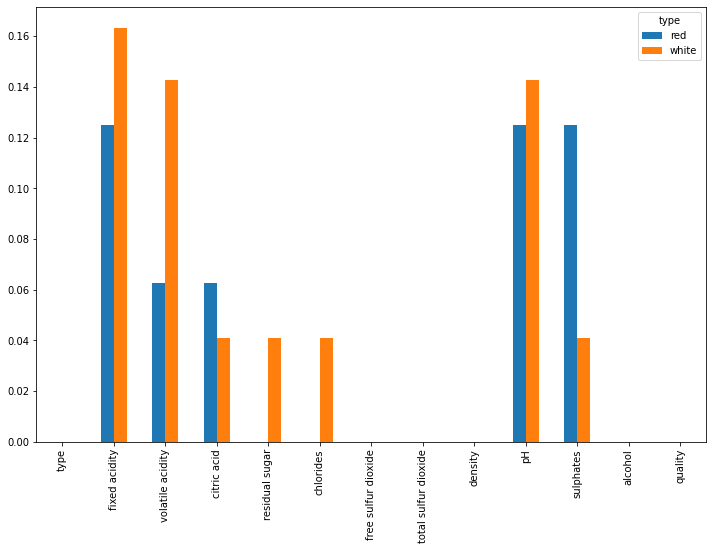

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
missingness.T.plot(kind='bar',ax=ax)
plt.show()

We've observed missing data for both types, we'd like to fill in missing values with mean values.

In [ ]:
df = pd.concat([df[['type']],df.groupby('type').transform(lambda x: x.fillna(x.mean()))],axis=1)

In [ ]:
df.isna().mean()

type                    0.0
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

There's no missing value after processing.

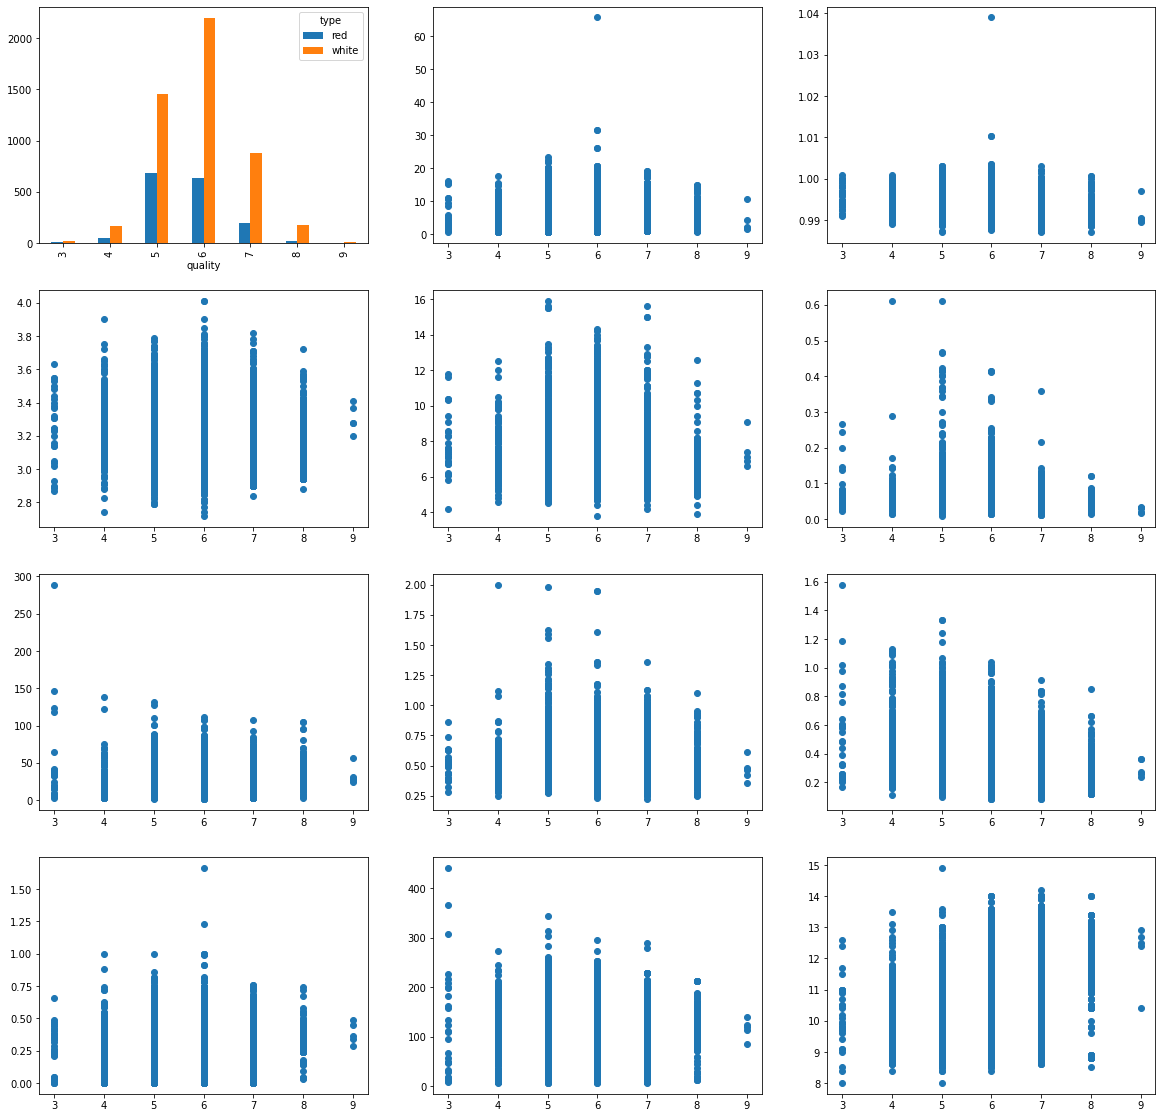

In [ ]:
fig, ax = plt.subplots(4,3,figsize=(20,20))
cols = df.columns
for i in range(len(cols)):
  col = cols[i]
  if col == 'quality':
    continue
  else:
    if col == 'type':
      df.pivot_table(index='type',columns='quality',aggfunc='size').T.plot(kind='bar',ax=ax[i%4][i%3])
    else:
      ax[i%4][i%3].scatter(y=col,x='quality',data=df)

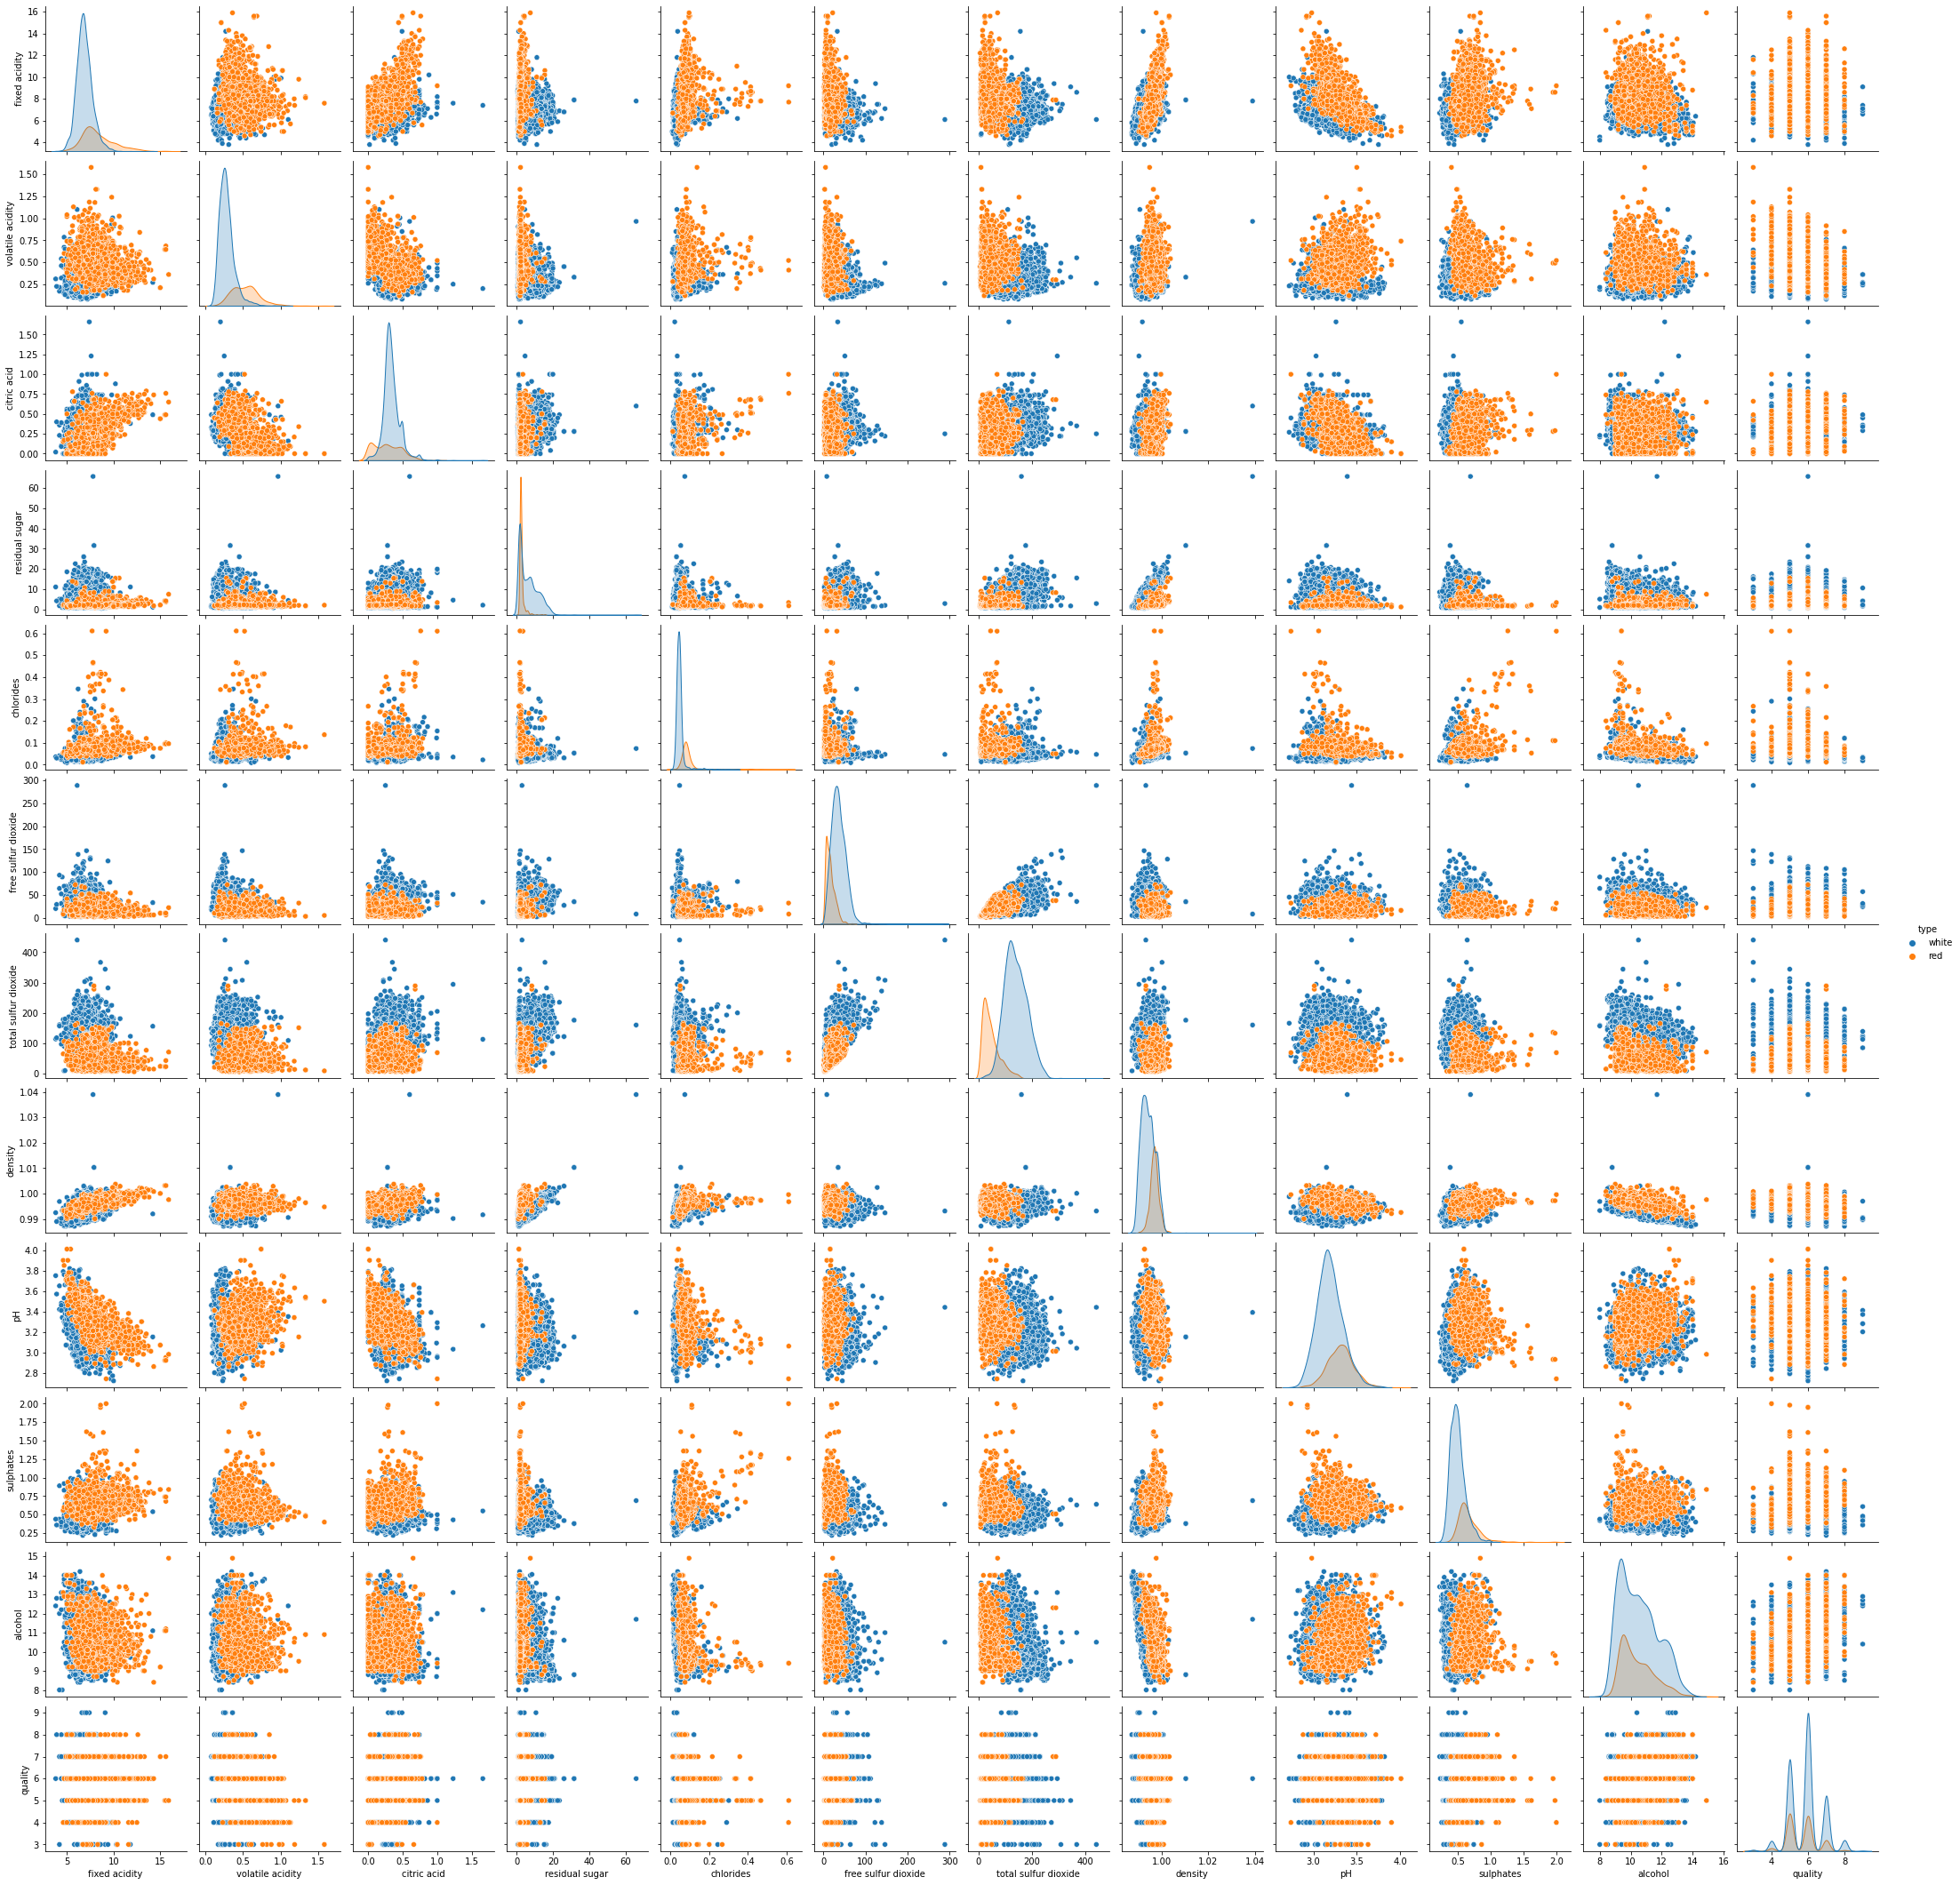

In [ ]:
sns.pairplot(df,hue='type')

In [ ]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.220252,0.322983,-0.112491,0.298392,-0.283463,-0.329960,0.458965,-0.251576,0.300179,-0.095475,-0.077024
volatile acidity,0.220252,1.000000,-0.377805,-0.196651,0.377185,-0.352924,-0.414905,0.271081,0.260878,0.225833,-0.037596,-0.265839
citric acid,0.322983,-0.377805,1.000000,0.142525,0.039198,0.133418,0.195239,0.096311,-0.328778,0.057133,-0.010503,0.085676
residual sugar,-0.112491,-0.196651,0.142525,1.000000,-0.128972,0.403335,0.495755,0.552462,-0.266785,-0.185811,-0.359707,-0.036771
chlorides,0.298392,0.377185,0.039198,-0.128972,1.000000,-0.194972,-0.279567,0.362590,0.045010,0.395463,-0.256864,-0.200731
free sulfur dioxide,-0.283463,-0.352924,0.133418,0.403335,-0.194972,1.000000,0.720934,0.025717,-0.145353,-0.188526,-0.179838,0.055463
total sulfur dioxide,-0.329960,-0.414905,0.195239,0.495755,-0.279567,0.720934,1.000000,0.032395,-0.237852,-0.275653,-0.265740,-0.041385
density,0.458965,0.271081,0.096311,0.552462,0.362590,0.025717,0.032395,1.000000,0.011988,0.259514,-0.686745,-0.305858
pH,-0.251576,0.260878,-0.328778,-0.266785,0.045010,-0.145353,-0.237852,0.011988,1.000000,0.191660,0.121016,0.019248
sulphates,0.300179,0.225833,0.057133,-0.185811,0.395463,-0.188526,-0.275653,0.259514,0.191660,1.000000,-0.003084,0.038493


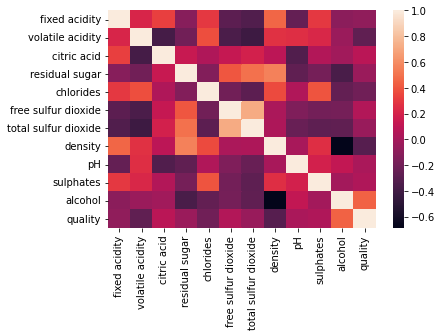

In [ ]:
correlations = df.corr()
sns.heatmap(correlations)
plt.show()

**Study of Correlations between Feature and Target Variable**

From the pair plots and the calculation of correlation, we see the following relations between the feature and target variables.

1.   The feature variables affecting the outcome of wine quality the most are volatile acidity, chlorides, density and alcohol.
2.   Alcohol shows a strong positive correlation while the other variables represent strong negative correlations.
3. Fixed Acidity, Residual Sugar, and Total Sulfur Dioxide have weak negative correlation with wine quality. 
4. Citric Acid, Free Sulfur Dioxide, pH and Sulphates have significantly weak positive correlation with the quality of wine. 


